In [1]:
# std libs
import os
import sys
import glob

# always good to have
import numpy
import pandas

# ploting libs
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import tadpose 

### Basic definitions

In [3]:
# main input required. SLEAP naysis file is expected to be in same folder with ending ".predictions.analysis.h5"
video_fn = "B:/fs3-bifexchgrp/BIF_StaffSci/Christoph/sweengrp/tadpose_examples/Tad1_Take1_oursNOGFP_st59.mp4"

In [4]:
# create Tadpole object
tadpole = tadpose.Tadpole.from_sleap(video_fn)

In [5]:
# create aligner by giving to part names and their correpsonding alignment location
aligner = tadpose.alignment.TadpoleAligner({'tail1' : numpy.array([0, 0.]), 
                                            'heart' : numpy.array([0, 1.])}, scale=False)   
tadpole.aligner = aligner

In [6]:
# tadpole has three important members

##1 list of body part names
tadpole.bodyparts

##2 pandas DataFrame with body part locations
tadpole.locations

# to get locations for single part use:
tadpole.locations["heart"]

# to get locations x,y values
tadpole.locations["heart"][["x", "y"]]

##3 aligned locations (access is same as with locations)
tadpole.aligned_locations;

C:\Users\csommer\anaconda3\envs\DLC-GPU\lib\site-packages\numpy\linalg\linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


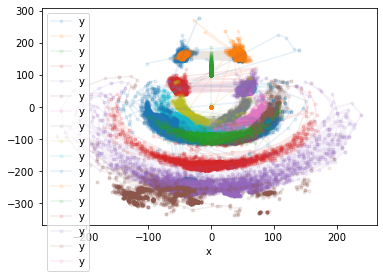

In [7]:
# plot aligned locations for all bodyparts
f, ax = plt.subplots()
for p in tadpole.bodyparts:
    tadpole.aligned_locations[p].plot("x", "y", marker=".", ax=ax, alpha=0.1)

### Extract features

In [8]:
# get DataFrames
df = tadpole.locations
df_aligned = tadpole.aligned_locations

# add time column (needs for speed computation)
df = tadpose.utils.add_time_column(df, fps=60)
df_aligned = tadpose.utils.add_time_column(df_aligned, fps=60)
    
# get all instantenous speeds
tadpose.analysis.get_speed(df, "heart", coords=( "y", "x"))
    

# get (aligned) average speed for some parts
parts_speed = ["forelimbR", "forelimbL", "hindlimbL", 
                   "hindlimbR", "tail1", "tail2", 
                   "tail3", "tailtip"]
    
for p in parts_speed:
    speeds = tadpose.analysis.get_speed(df_aligned, p, coords=( "y", "x"))
    print(p, f"Speed mean: {speeds.mean()}")
    

forelimbR Speed mean: 1.5262847778097433
forelimbL Speed mean: 1.3972590494185502
hindlimbL Speed mean: 3.1406753071341336
hindlimbR Speed mean: 3.2776714430603993
tail1 Speed mean: 1.5957274161459797e-13
tail2 Speed mean: 2.825345613603341
tail3 Speed mean: 5.423113303909113
tailtip Speed mean: nan


### Spatial plots (single)

C:\Users\csommer\anaconda3\envs\DLC-GPU\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\csommer\anaconda3\envs\DLC-GPU\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


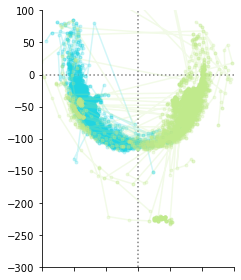

In [9]:
f, ax = plt.subplots()
ax = tadpose.visu.plot_parts(df_aligned, 
                                 tadpole,
                                 ["hindlimbL", "hindlimbR"],
                                 alpha=0.2, 
                                 ax=ax, 
                                 scatter=True, 
                                 lines=True,
                                 contour=False)
plt.tight_layout()
    
    
    